In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np

In [2]:
# We import the data from a csv file
data = pd.read_csv('results_dm_vfinal_standardized_withf0coeff_20231227.csv', sep=';')

In [3]:
data

,filename,sample,file,utt,iu,position,dm_text,N_PU,speaker,stressed_vowel,...,ratio_min_f0_dm,ratio_max_f0_stressed_dm,ratio_min_f0_stressed_dm,zsil_mean,zsil_stressed_syl,dm_duration,coef_0,coef_1,coef_2,coef_3
0,bfamcv01__002__GIL,OLIVER,bfamcv01,2,CNT,0.0,ô,1,GIL,#o,...,0.983107,-0.304754,5.679705,-0.142,-0.142,0.108164,0.000017,-0.003885,0.059621,2.733920
1,bfamcv01__019__EVN,OLIVER,bfamcv01,19,EXP,0.0,Nossa,1,EVN,#oh,...,0.160827,2.198977,-2.488045,-0.904,-0.904,0.147619,-0.000106,0.004373,-0.029251,-0.369788
2,bfamcv01__048__EVN,OLIVER,bfamcv01,48,CNT,0.0,ô,1,EVN,#oU,...,0.981160,-1.779314,3.764888,2.059,2.059,0.161825,0.000186,-0.011093,0.152832,-0.743381
3,bfamcv01__051__LUI,OLIVER,bfamcv01,51,EXP,0.0,ah,1,LUI,#a,...,0.001150,1.052422,-3.570504,0.083,0.083,0.135725,-0.000320,0.010525,0.018429,-2.202685
4,bfamcv01__051__LUI,OLIVER,bfamcv01,51,CNT,0.0,velho,2,LUI,#ehI,...,0.853244,-4.753377,1.759249,-0.004,-0.004,0.169890,0.000256,-0.014031,0.194063,-0.918259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,bpubmn01__097__SHE,OLIVER,bpubmn01,97,ALL,0.5,gente,4,SHE,#eN,...,0.569389,-34.570453,-36.209915,-1.557,-1.557,0.247738,0.000061,0.000548,-0.076060,1.669450
427,bpubmn01__098__SHE,OLIVER,bpubmn01,98,INP,0.0,porque,1,SHE,#e,...,0.623421,-1.201171,0.799796,0.525,0.525,0.205259,0.001220,-0.043119,0.329262,-1.249335
428,bpubmn01__110__SHE,OLIVER,bpubmn01,110,CNT,0.0,então olha,1,SHE,#oh,...,0.433829,4.263828,-1.451185,-1.414,-1.414,0.093548,-0.000244,0.007431,-0.108439,2.847450
429,bpubmn10_13_70417_0_71030_0_NAMES,SAULO,bpubmn10,13,ALL,1.0,Junhia,2,Débora,#u,...,0.756404,-5.926195,1.424070,-0.279,-0.279,0.265592,0.000158,-0.000757,-0.187648,0.355966


In [23]:
# Import PCA from sklearn
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming df is your DataFrame and 'dm_text' is the column containing text in Brazilian Portuguese
model = SentenceTransformer('neuralmind/bert-base-portuguese-cased', device='cpu')  # Explicitly set device to CPU


# Function to encode text using sentence-transformers and mean pooling
def encode_text(text):

    embeddings = model.encode(text)
    return embeddings


def encode_mean_pool(text):

    embeddings = model.encode(text)
    return np.mean(embeddings)

def encode_pca1(text):

    embeddings = model.encode([text])
    pca = PCA(n_components=1)
    pca.fit(embeddings)
    pca1 = pca.components_[0]
    return pca1



# Function to encode text using sentence-transformers and get the first discriminant component using LDA
def encode_lda1(text):
    embeddings = model.encode([text])  # Convert the text to a list to ensure a matrix-like structure
    lda = LinearDiscriminantAnalysis(n_components=1)
    lda.fit(embeddings, [0])  # Provide dummy labels since LDA requires labels
    lda1 = lda.scalings_[:, 0]
    return lda1



# Apply the function to the 'dm_text' column
#data['bert_encoded'] = data['dm_text'].apply(encode_text)
#data['bert_encoded_mean_pool'] = data['dm_text'].apply(encode_mean_pool)
#data['bert_encoded_pca1'] = data['dm_text'].apply(encode_pca1)
#data['bert_encoded_lda1'] = data['dm_text'].apply(encode_lda1)


No sentence-transformers model found with name /Users/saulosantos/.cache/torch/sentence_transformers/neuralmind_bert-base-portuguese-cased. Creating a new one with MEAN pooling.


In [24]:
# We add a column that will encode the dm_text variable and the iu (which is going to be the target variable)
data['dm_text_encoded'] = data['dm_text'].astype('category').cat.codes
data['iu_encoded'] = data['iu'].astype('category').cat.codes

# We need to create a dictionary with the codes and the labels
dm_text_dict = dict(enumerate(data['dm_text'].astype('category').cat.categories))
iu_dict = dict(enumerate(data['iu'].astype('category').cat.categories))

In [25]:
# Let's encode y using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit label encoder
le.fit(data['iu'])

y = le.transform(data['iu'])

In [26]:
# Create a dictionary that encodes column names and their indexes
col_names = dict(enumerate(data.columns))

print(col_names)

{0: 'filename', 1: 'sample', 2: 'file', 3: 'utt', 4: 'iu', 5: 'position', 6: 'dm_text', 7: 'N_PU', 8: 'speaker', 9: 'stressed_vowel', 10: 'mean_pitch_dm', 11: 'std_pitch_dm', 12: 'max_pitch_dm', 13: 'min_pitch_dm', 14: 'mean_intensity_dm', 15: 'std_intensity_dm', 16: 'max_intensity_dm', 17: 'min_intensity_dm', 18: 'mean_intensity_stressed_dm', 19: 'mean_se_stressed_dm', 20: 'pitch_slope_dm', 21: 'pitch_slope_stressed_dm', 22: 'pitch_range_dm', 23: 'pitch_slope_before_stressed_dm', 24: 'pitch_slope_after_stressed_dm', 25: 'ratio_max_intensity_dm', 26: 'ratio_min_intensity_dm', 27: 'ratio_max_intensity_stressed_dm', 28: 'ratio_min_intensity_stressed_dm', 29: 'ratio_max_f0_dm', 30: 'ratio_min_f0_dm', 31: 'ratio_max_f0_stressed_dm', 32: 'ratio_min_f0_stressed_dm', 33: 'zsil_mean', 34: 'zsil_stressed_syl', 35: 'dm_duration', 36: 'coef_0', 37: 'coef_1', 38: 'coef_2', 39: 'coef_3', 40: 'bert_encoded', 41: 'bert_encoded_mean_pool', 42: 'dm_text_encoded', 43: 'iu_encoded'}


In [47]:
# We will try a first model with all the variables + postion. We do include the dm_text_encoded variable
# We will create a list with the indices of the variables that will be used in the model: 4 + 9 to 33
variables_01 = [5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39]

# We get the data for the model and store it in X
X = data.iloc[:, variables_01].values

In [48]:
X.shape

(431, 29)

In [29]:
X

array([[ 0.00000000e+00,  2.23549728e+00,  3.77211653e-01, ...,
         2.73392023e+00,  3.56006995e-03,  1.11000000e+02],
       [ 0.00000000e+00, -4.06757687e-01,  1.34585279e-01, ...,
        -3.69788093e-01,  3.50388815e-03,  3.40000000e+01],
       [ 0.00000000e+00, -6.55653244e-01,  3.54471951e-01, ...,
        -7.43380774e-01,  3.56006995e-03,  1.11000000e+02],
       ...,
       [ 0.00000000e+00, -2.60836481e+00,  7.44242734e-01, ...,
         2.84745031e+00,  2.77497619e-03,  6.80000000e+01],
       [ 1.00000000e+00, -1.49627653e+00,  9.04486935e-01, ...,
         3.55965836e-01,  1.97615591e-03,  2.10000000e+01],
       [ 0.00000000e+00,  3.02946691e-01,  2.38889288e-01, ...,
         2.50624792e-02,  3.50388815e-03,  3.40000000e+01]])

In [30]:
# If check if there are missing values and replace them with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# We fit the imputer to the data
imputer.fit(X)

# We transform the data
X_imputed = imputer.transform(X)

In [31]:
# Let's scale the X_imputed data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# We fit the scaler to the data
scaler.fit(X_imputed)

# We transform the data
X_scaled = scaler.transform(X_imputed)

In [32]:
X.shape

(431, 31)

Best F1-score: 0.69900807891643 (k=30)
Best Accuracy: 0.703016241299304 (k=30)
Selected features for best F1-score: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


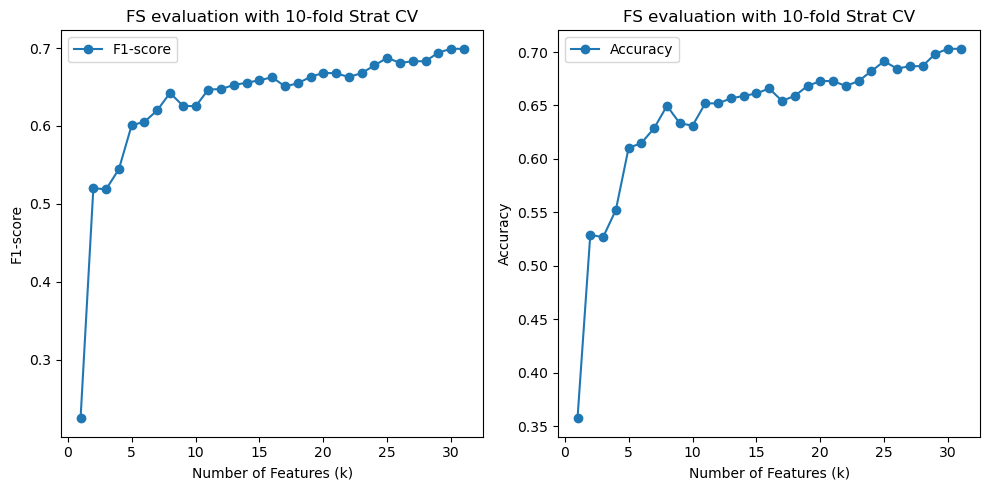

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
# Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Assuming you have a dataset X and labels y
# X.shape should be (431, 30)
# y.shape should be (431,)

# Set random seed for reproducibility
np.random.seed(42)

# Initialize LDA
clf = LDA()

# Define the range of k values (number of features)
k_values = range(1, 32)

# Initialize lists to store results
f1_scores = []
accuracy_scores = []
selected_features = []

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Loop through different values of k
for k in k_values:
    # Feature selection using SelectKBest with F-statistic
    selector = SelectKBest(f_classif, k=k)

    # Use cross_val_predict to get predictions for each fold
    X_selected = selector.fit_transform(X_scaled, y)
    y_pred_cv = cross_val_predict(clf, X_selected, y, cv=cv)

    # Calculate F1-score and accuracy and store results
    f1 = f1_score(y, y_pred_cv, average='weighted')  # Use 'weighted' for multi-class classification
    accuracy = accuracy_score(y, y_pred_cv)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    selected_features.append(selector.get_support(indices=True))

# Find the index of the best F1-score
best_index_f1 = np.argmax(f1_scores)
best_index_accuracy = np.argmax(accuracy_scores)

# Print the results
print(f"Best F1-score: {f1_scores[best_index_f1]} (k={best_index_f1+1})")
print(f"Best Accuracy: {accuracy_scores[best_index_accuracy]} (k={best_index_accuracy+1})")
print(f"Selected features for best F1-score: {selected_features[best_index_f1]}")

# Plot k versus F1-score and Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, f1_scores, marker='o', label='F1-score')
plt.xlabel('Number of Features (k)')
plt.ylabel('F1-score')
plt.title('FS evaluation with 10-fold Strat CV')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, accuracy_scores, marker='o', label='Accuracy')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.title('FS evaluation with 10-fold Strat CV')
plt.legend()

plt.tight_layout()
plt.show()

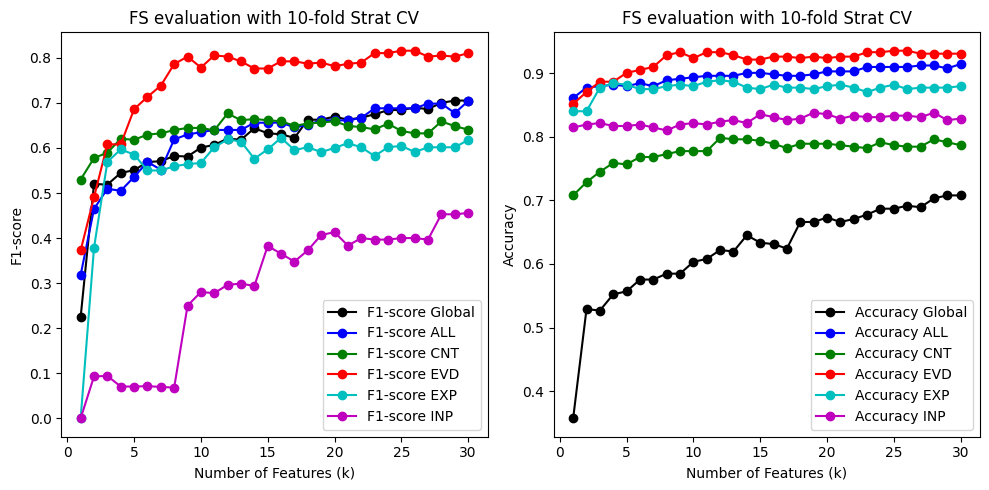

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Assuming you have a dataset X and labels y
# X.shape should be (431, 30)
# y.shape should be (431,)

# classes
classes_names = ['ALL', 'CNT', 'EVD', 'EXP', 'INP']
classes = [0, 1, 2, 3, 4]

# Set random seed for reproducibility
np.random.seed(42)

# Initialize LDA
clf = LDA()

# Define the range of k values (number of features)
k_values = range(1, 31)

# Initialize lists to store results
f1_scores = {cls: [] for cls in classes}
accuracy_scores = {cls: [] for cls in classes}
selected_features = {cls: [] for cls in classes}

# Initialize the global model results
f1_scores['global'] = []
accuracy_scores['global'] = []

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Loop through different values of k
for k in k_values:
    # Create binary labels for the global model
    y_binary_global = y.copy()

    # Feature selection using SelectKBest with F-statistic
    selector_global = SelectKBest(f_classif, k=k)

    # Use cross_val_predict to get predictions for each fold for the global model
    X_selected_global = selector_global.fit_transform(X_scaled, y_binary_global)
    y_pred_cv_global = cross_val_predict(clf, X_selected_global, y_binary_global, cv=cv)

    # Calculate F1-score and accuracy and store results for the global model
    f1_global = f1_score(y_binary_global, y_pred_cv_global, average='weighted')  # Use 'weighted' for multi-class classification
    accuracy_global = accuracy_score(y_binary_global, y_pred_cv_global)

    # Store results for the global model
    f1_scores['global'].append(f1_global)
    accuracy_scores['global'].append(accuracy_global)

    for target_class in classes:
        # Create binary labels for one-vs-rest
        y_binary = (y == target_class).astype(int)

        # Feature selection using SelectKBest with F-statistic
        selector = SelectKBest(f_classif, k=k)

        # Use cross_val_predict to get predictions for each fold
        X_selected = selector.fit_transform(X_scaled, y_binary)
        y_pred_cv = cross_val_predict(clf, X_selected, y_binary, cv=cv)

        # Calculate F1-score and accuracy and store results
        f1 = f1_score(y_binary, y_pred_cv, average='binary')  # Use 'binary' for binary classification
        accuracy = accuracy_score(y_binary, y_pred_cv)
        f1_scores[target_class].append(f1)
        accuracy_scores[target_class].append(accuracy)
        selected_features[target_class].append(selector.get_support(indices=True))

# Plot k versus F1-score and Accuracy
plt.figure(figsize=(10, 5))

# Handle the 'global' case separately
plt.subplot(1, 2, 1)
plt.plot(k_values, f1_scores['global'], marker='o', label=f'F1-score Global', color='k')
plt.xlabel('Number of Features (k)')
plt.ylabel('F1-score')
plt.title('FS evaluation with 10-fold Strat CV')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, accuracy_scores['global'], marker='o', label=f'Accuracy Global', color='k')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.title('FS evaluation with 10-fold Strat CV')
plt.legend()

# Plot for other classes
for target_class, color in zip(classes, ['b', 'g', 'r', 'c', 'm', 'y']):
    plt.subplot(1, 2, 1)
    plt.plot(k_values, f1_scores[target_class], marker='o', label=f'F1-score {classes_names[target_class]}', color=color)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(k_values, accuracy_scores[target_class], marker='o', label=f'Accuracy {classes_names[target_class]}', color=color)
    plt.legend()

plt.tight_layout()
plt.show()


In [39]:
# ...

# Initialize lists to store results
f1_scores = {cls: [] for cls in classes}
accuracy_scores = {cls: [] for cls in classes}
selected_features = {cls: [] for cls in classes}
best_features = {cls: None for cls in classes}  # To store the best features for each class

# Initialize the global model results
f1_scores['global'] = []
accuracy_scores['global'] = []

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Loop through different values of k
for k in k_values:
    # Create binary labels for the global model
    y_binary_global = y.copy()

    # Feature selection using SelectKBest with F-statistic
    selector_global = SelectKBest(f_classif, k=k)

    # Use cross_val_predict to get predictions for each fold for the global model
    X_selected_global = selector_global.fit_transform(X_scaled, y_binary_global)
    y_pred_cv_global = cross_val_predict(clf, X_selected_global, y_binary_global, cv=cv)

    # Calculate F1-score and accuracy and store results for the global model
    f1_global = f1_score(y_binary_global, y_pred_cv_global, average='weighted')  # Use 'weighted' for multi-class classification
    accuracy_global = accuracy_score(y_binary_global, y_pred_cv_global)

    # Store results for the global model
    f1_scores['global'].append(f1_global)
    accuracy_scores['global'].append(accuracy_global)

    for target_class in classes:
        # Create binary labels for one-vs-rest
        y_binary = (y == target_class).astype(int)

        # Feature selection using SelectKBest with F-statistic
        selector = SelectKBest(f_classif, k=k)

        # Use cross_val_predict to get predictions for each fold
        X_selected = selector.fit_transform(X_scaled, y_binary)
        y_pred_cv = cross_val_predict(clf, X_selected, y_binary, cv=cv)

        # Calculate F1-score and accuracy and store results
        f1 = f1_score(y_binary, y_pred_cv, average='binary')  # Use 'binary' for binary classification
        accuracy = accuracy_score(y_binary, y_pred_cv)
        f1_scores[target_class].append(f1)
        accuracy_scores[target_class].append(accuracy)
        selected_features[target_class].append(selector.get_support(indices=True))

    # Find the index of the best F1-score for the current k
    best_index = np.argmax(f1_scores[target_class])

    # Get the best features for the current class
    best_features_candidate = selected_features[target_class][best_index]

    # Check if any features are selected
    if best_features_candidate.any():
        best_features[target_class] = best_features_candidate

# Print the best features for each class
for target_class in classes:
    print(f"Best Features for {classes_names[target_class]} (k={best_index + 1}): {best_features[target_class]}")

# Rest of the plotting code...



Best Features for ALL (k=30): None
Best Features for CNT (k=30): None
Best Features for EVD (k=30): None
Best Features for EXP (k=30): None
Best Features for INP (k=30): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [43]:
# Let's do a classification model only with embeddings
X_bert = np.vstack(data['bert_encoded'].apply(lambda x: np.array(x)).to_numpy())
y_bert = y

X_bert.shape


(431, 768)

F1-score: 0.6975788830481736
Accuracy: 0.6983758700696056


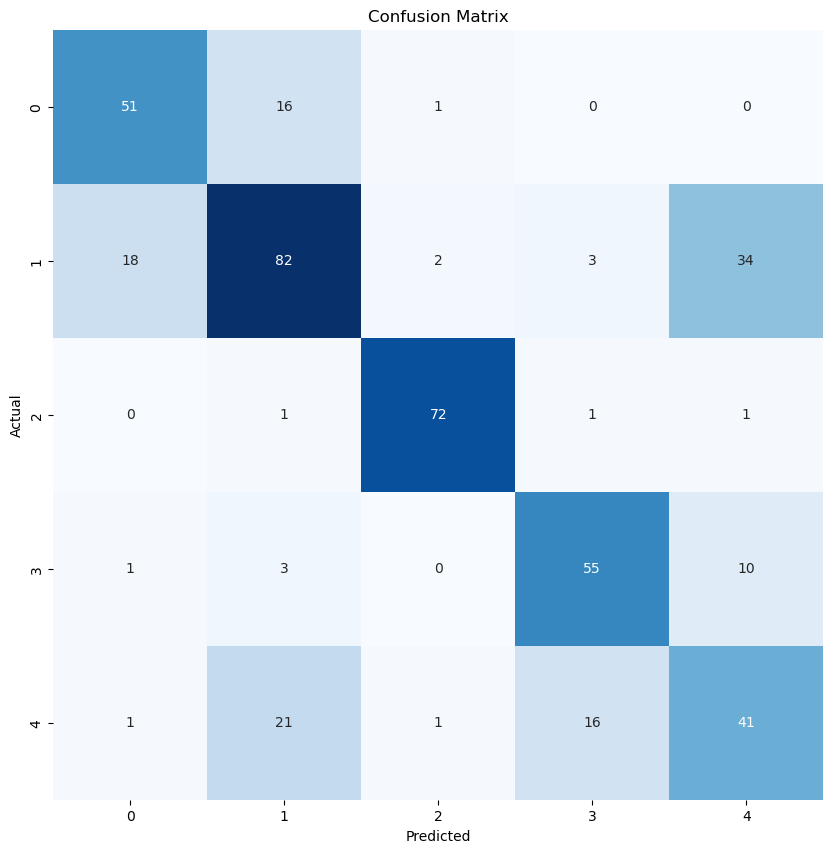

In [46]:
# Run a 10-fold stratified cross-validation using LDA
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import f1_score, accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Initialize LDA
clf = LDA()

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use cross_val_predict to get predictions for each fold
y_pred_cv = cross_val_predict(clf, X_bert, y_bert, cv=cv)

# Calculate F1-score and accuracy and store results
f1 = f1_score(y_bert, y_pred_cv, average='weighted')  # Use 'weighted' for multi-class classification
accuracy = accuracy_score(y_bert, y_pred_cv)

# Print the results
print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_bert, y_pred_cv)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
X_bert

array([[ 0.25011083, -0.15103422,  0.7214422 , ..., -0.14154899,
         0.07780287, -0.19187768],
       [-0.06127737,  0.17391618,  0.79379994, ..., -0.02783719,
         0.3358985 , -0.27201006],
       [ 0.25011083, -0.15103422,  0.7214422 , ..., -0.14154899,
         0.07780287, -0.19187768],
       ...,
       [-0.10223649,  0.02393535,  0.67639506, ...,  0.26150814,
         0.18275973, -0.19816823],
       [ 0.32077745, -0.1044115 ,  0.60253674, ..., -0.04355898,
        -0.0064503 , -0.23358522],
       [-0.06127737,  0.17391618,  0.79379994, ..., -0.02783719,
         0.3358985 , -0.27201006]], dtype=float32)

In [55]:
# another model with X + X_bert

X_all = np.hstack((X_scaled, X_bert))

X_all.shape

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# We fit and transform the scaler to the data
X_all_scaled = scaler.fit_transform(X_all)

In [53]:
# Run a 10-fold stratified cross-validation using LDA
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import f1_score, accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Initialize LDA
clf = LDA()

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use cross_val_predict to get predictions for each fold
y_pred_cv = cross_val_predict(clf, X_all_scaled, y, cv=cv)

# Calculate F1-score and accuracy and store results
f1 = f1_score(y, y_pred_cv, average='weighted')  # Use 'weighted' for multi-class classification
accuracy = accuracy_score(y, y_pred_cv)

# Print the results
print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")


F1-score: 0.7163275682196891
Accuracy: 0.7169373549883991


In [56]:
X_all_scaled.shape

(431, 799)

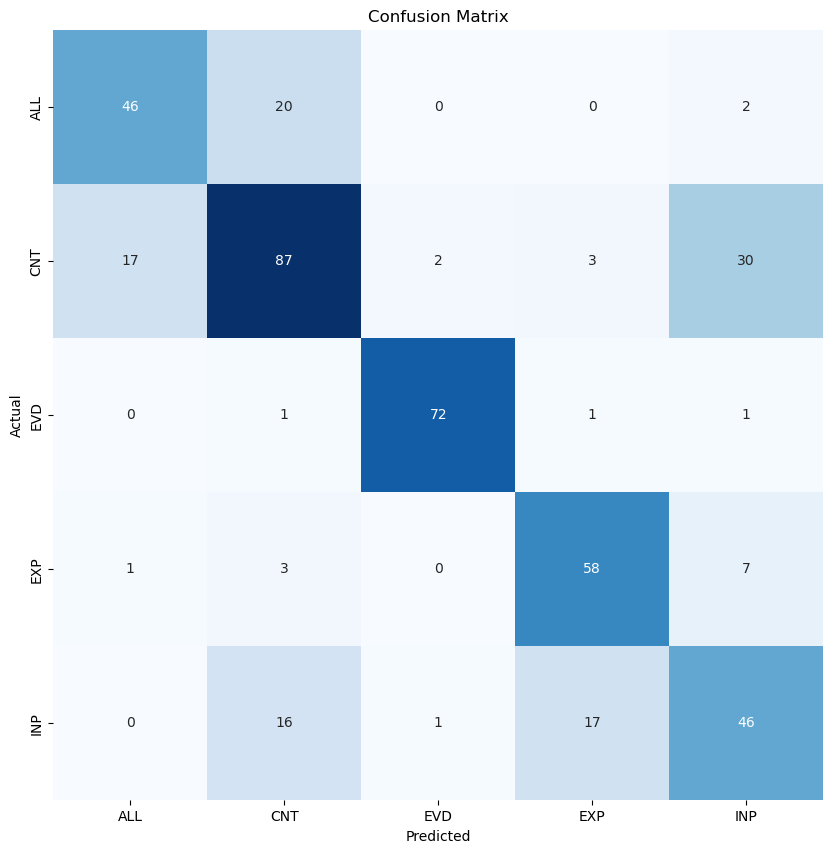

In [54]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

label_dict = {0: 'ALL', 1: 'CNT', 2: 'EVD', 3: 'EXP', 4: 'INP'}

# Get the confusion matrix
cm = confusion_matrix(y, y_pred_cv)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# Add 
plt.show()

Finished k=1
Finished k=2
Finished k=3
Finished k=4
Finished k=5
Finished k=6
Finished k=7
Finished k=8
Finished k=9
Finished k=10
Finished k=11
Finished k=12
Finished k=13
Finished k=14
Finished k=15
Finished k=16
Finished k=17
Finished k=18
Finished k=19
Finished k=20
Finished k=21
Finished k=22
Finished k=23
Finished k=24
Finished k=25
Finished k=26
Finished k=27
Finished k=28
Finished k=29
Finished k=30
Finished k=31
Finished k=32
Finished k=33
Finished k=34
Finished k=35
Finished k=36
Finished k=37
Finished k=38
Finished k=39
Finished k=40
Finished k=41
Finished k=42
Finished k=43
Finished k=44
Finished k=45
Finished k=46
Finished k=47
Finished k=48
Finished k=49
Finished k=50
Finished k=51
Finished k=52
Finished k=53
Finished k=54
Finished k=55
Finished k=56
Finished k=57
Finished k=58
Finished k=59
Finished k=60
Finished k=61
Finished k=62
Finished k=63
Finished k=64
Finished k=65
Finished k=66
Finished k=67
Finished k=68
Finished k=69
Finished k=70
Finished k=71
Finished k=72
F

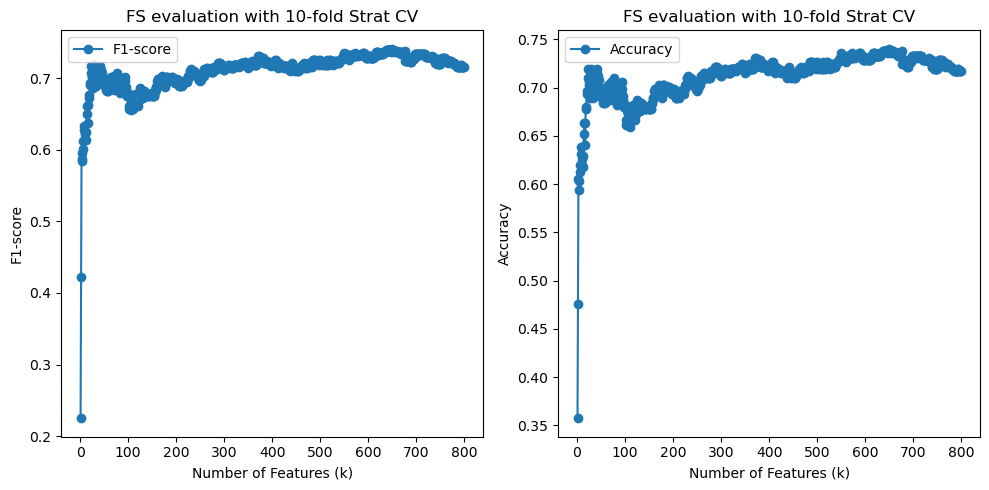

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
# Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Assuming you have a dataset X and labels y
# X.shape should be (431, 30)
# y.shape should be (431,)

# Set random seed for reproducibility
np.random.seed(42)

# Initialize LDA
clf = LDA()

# Define the range of k values (number of features)
k_values = range(1, X_all_scaled.shape[1] + 1)

# Initialize lists to store results
f1_scores = []
accuracy_scores = []
selected_features = []

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Loop through different values of k
for k in k_values:
    # Feature selection using SelectKBest with F-statistic
    selector = SelectKBest(f_classif, k=k)

    # Use cross_val_predict to get predictions for each fold
    X_selected = selector.fit_transform(X_all_scaled, y)
    y_pred_cv = cross_val_predict(clf, X_selected, y, cv=cv)

    # Calculate F1-score and accuracy and store results
    f1 = f1_score(y, y_pred_cv, average='weighted')  # Use 'weighted' for multi-class classification
    accuracy = accuracy_score(y, y_pred_cv)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    selected_features.append(selector.get_support(indices=True))

    # Print status
    print(f"Finished k={k}")

# Find the index of the best F1-score
best_index_f1 = np.argmax(f1_scores)
best_index_accuracy = np.argmax(accuracy_scores)

# Print the results
print(f"Best F1-score: {f1_scores[best_index_f1]} (k={best_index_f1+1})")
print(f"Best Accuracy: {accuracy_scores[best_index_accuracy]} (k={best_index_accuracy+1})")
print(f"Selected features for best F1-score: {selected_features[best_index_f1]}")

# Plot k versus F1-score and Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, f1_scores, marker='o', label='F1-score')
plt.xlabel('Number of Features (k)')
plt.ylabel('F1-score')
plt.title('FS evaluation with 10-fold Strat CV')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, accuracy_scores, marker='o', label='Accuracy')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.title('FS evaluation with 10-fold Strat CV')
plt.legend()

plt.tight_layout()
plt.show()


Finished k=1
Finished k=2
Finished k=3
Finished k=4
Finished k=5
Finished k=6
Finished k=7
Finished k=8
Finished k=9
Finished k=10
Finished k=11
Finished k=12
Finished k=13
Finished k=14
Finished k=15
Finished k=16
Finished k=17
Finished k=18
Finished k=19
Finished k=20
Finished k=21
Finished k=22
Finished k=23
Finished k=24
Best F1-score: 0.7174062844022702 (k=23)
Best Accuracy: 0.7192575406032483 (k=23)
Selected features for best F1-score: [  0  37 141 143 163 184 226 257 295 312 376 435 438 439 441 451 500 577
 587 677 691 773 793]


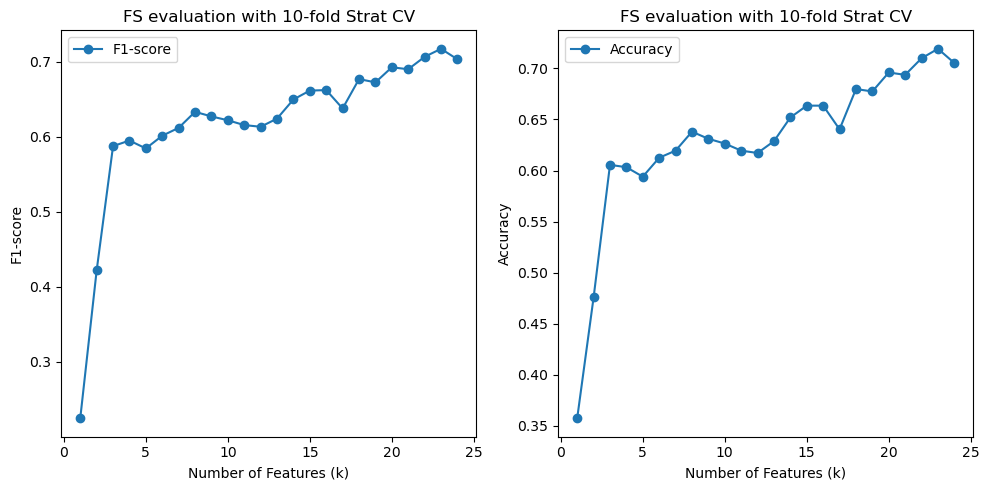

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
# Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Assuming you have a dataset X and labels y
# X.shape should be (431, 30)
# y.shape should be (431,)

# Set random seed for reproducibility
np.random.seed(42)

# Initialize LDA
clf = LDA()

# Define the range of k values (number of features)
k_values = range(1, 25)

# Initialize lists to store results
f1_scores = []
accuracy_scores = []
selected_features = []

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Loop through different values of k
for k in k_values:
    # Feature selection using SelectKBest with F-statistic
    selector = SelectKBest(f_classif, k=k)

    # Use cross_val_predict to get predictions for each fold
    X_selected = selector.fit_transform(X_all_scaled, y)
    y_pred_cv = cross_val_predict(clf, X_selected, y, cv=cv)

    # Calculate F1-score and accuracy and store results
    f1 = f1_score(y, y_pred_cv, average='weighted')  # Use 'weighted' for multi-class classification
    accuracy = accuracy_score(y, y_pred_cv)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    selected_features.append(selector.get_support(indices=True))

    # Print status
    print(f"Finished k={k}")

# Find the index of the best F1-score
best_index_f1 = np.argmax(f1_scores)
best_index_accuracy = np.argmax(accuracy_scores)

# Print the results
print(f"Best F1-score: {f1_scores[best_index_f1]} (k={best_index_f1+1})")
print(f"Best Accuracy: {accuracy_scores[best_index_accuracy]} (k={best_index_accuracy+1})")
print(f"Selected features for best F1-score: {selected_features[best_index_f1]}")

# Plot k versus F1-score and Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, f1_scores, marker='o', label='F1-score')
plt.xlabel('Number of Features (k)')
plt.ylabel('F1-score')
plt.title('FS evaluation with 10-fold Strat CV')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, accuracy_scores, marker='o', label='Accuracy')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.title('FS evaluation with 10-fold Strat CV')
plt.legend()

plt.tight_layout()
plt.show()
